In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
#file_path = '/kaggle/input/usa-house-prices/USA Housing Dataset.csv'
data = pd.read_csv('USA Housing Dataset.csv')

# Display the first few rows and summary of the dataset
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [5]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.drop(columns = ["country"], inplace = True)

In [8]:
data.drop('date', axis=1, inplace=True)

In [9]:
data.drop('street', axis=1, inplace=True)

<Axes: ylabel='price'>

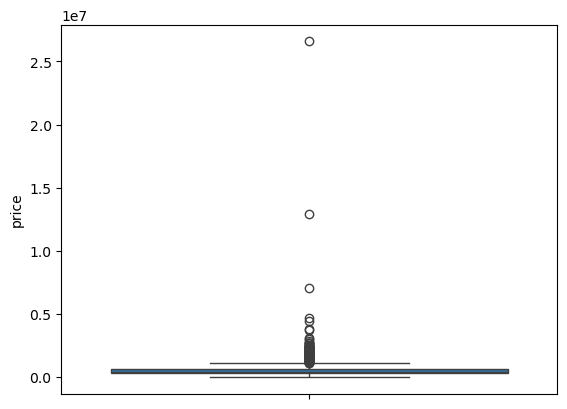

In [10]:
sns.boxplot(data['price'])

In [11]:
percentile25 = data['price'].quantile(0.25)
print("25th Percentile:", percentile25)

percentile75 = data['price'].quantile(0.75)
print("75th Percentile:", percentile75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outliers
uplimit = percentile75 + 1.5 * iqr
lolimit = percentile25 - 1.5 * iqr
print("Upper Limit:", uplimit, "Lower Limit:", lolimit)

# Create a copy of the DataFrame
new_data = data.copy()

# Capping the outliers
new_data['price'] = np.where(
    new_data['price'] > uplimit, uplimit,
    np.where(new_data['price'] < lolimit, lolimit, new_data['price'])
)

# Display the first few rows of the new DataFrame to check the changes
print(new_data.head())

25th Percentile: 320000.0
75th Percentile: 659125.0
Upper Limit: 1167812.5 Lower Limit: -188687.5
       price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   376000.0       3.0       2.00         1340      1384     3.0           0   
1   800000.0       4.0       3.25         3540    159430     2.0           0   
2  1167812.5       5.0       6.50         7270    130017     2.0           0   
3   324000.0       3.0       2.25          998       904     2.0           0   
4   549900.0       5.0       2.75         3060      7015     1.0           0   

   view  condition  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3        1340              0      2008             0   
1     0          3        3540              0      2007             0   
2     0          3        6420            850      2010             0   
3     0          3         798            200      2007             0   
4     0          5        1600           1460      1979 

In [12]:
data = new_data.copy()

<Axes: ylabel='price'>

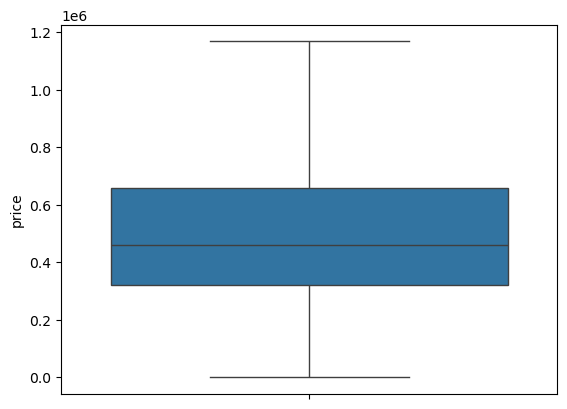

In [13]:
sns.boxplot(data['price'])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4140 non-null   float64
 1   bedrooms       4140 non-null   float64
 2   bathrooms      4140 non-null   float64
 3   sqft_living    4140 non-null   int64  
 4   sqft_lot       4140 non-null   int64  
 5   floors         4140 non-null   float64
 6   waterfront     4140 non-null   int64  
 7   view           4140 non-null   int64  
 8   condition      4140 non-null   int64  
 9   sqft_above     4140 non-null   int64  
 10  sqft_basement  4140 non-null   int64  
 11  yr_built       4140 non-null   int64  
 12  yr_renovated   4140 non-null   int64  
 13  city           4140 non-null   object 
 14  statezip       4140 non-null   object 
dtypes: float64(4), int64(9), object(2)
memory usage: 485.3+ KB


In [15]:
X = data.drop('price', axis=1)
y = data['price']

In [16]:
categorical_cols = X.select_dtypes(include='object').columns

In [17]:
for i, col in enumerate(categorical_cols):
    print(f"Categorical column {i}: {col}")

Categorical column 0: city
Categorical column 1: statezip


In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep remaining columns as they are
)

# Create a pipeline that includes scaling and modeling
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('model', Ridge(alpha=1.0, random_state=42))
])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['city', 'statezip'], dtype='object'))])),
                ('scaler', StandardScaler()),
                ('model', Ridge(random_state=42))])

In [21]:
y_pred = pipeline.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 22057295918.642345
Mean Absolute Error: 90010.98613542419
Root Mean Squared Error: 148516.98865329294
R-squared: 0.6781762383075948
